In [4]:
from detectron2.config import LazyConfig, instantiate
from detectron2.checkpoint import DetectionCheckpointer
from demo.demo import VisualizationDemo, get_parser
import numpy as np
from detectron2.data.detection_utils import read_image
import matplotlib.pyplot as plt
import cv2
import os
config_file = 'projects/dino/configs/odor3_fn_l_lrf_384_fl4_5scale_50ep.py'
ckpt_pth = '/hdd/models/dino-focal/focaldino_ep18.pth'

try:
    cfg = LazyConfig.load(config_file)
except AssertionError as e:
    if str(e).startswith('Dataset '):
        pass
    else:
        raise e
model = instantiate(cfg.model)
model.to(cfg.train.device)
checkpointer = DetectionCheckpointer(model)
checkpointer.load(ckpt_pth)
model.eval()
demo = VisualizationDemo(
    model=model,
    min_size_test=800,
    max_size_test=1333,
    img_format='RGB',
    metadata_dataset='odor_test')

def treat_grayscale(img):
    if len(img.shape) == 2:
        return np.stack((img,)*3, axis=-1)
    else:
        return img

(1591, 2000, 3)
(1591, 2000, 3)


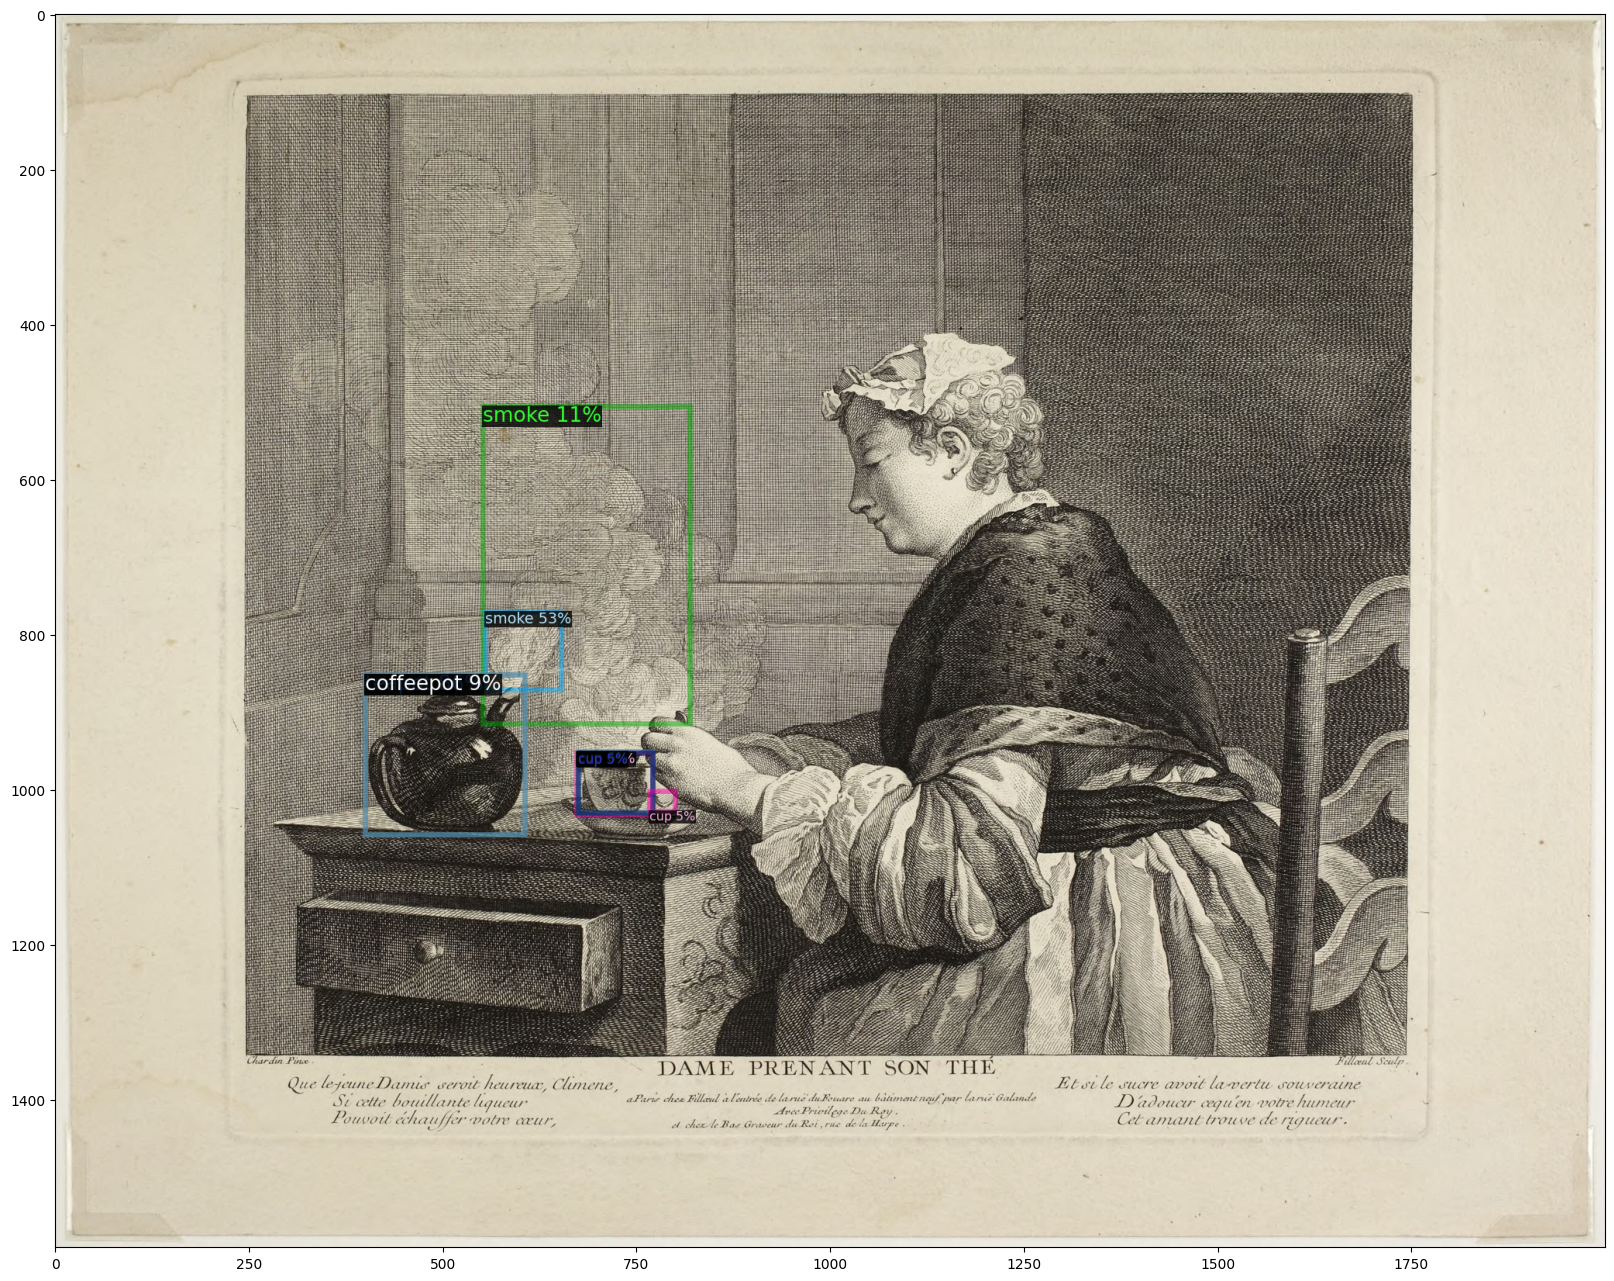

In [5]:
#link = 'https://upload.wikimedia.org/wikipedia/commons/6/62/Gaspar_Peeter_Verbruggen_d.%C3%86._-_Blomsterkrans_med_Johannes_D%C3%B8beren_-_KMSsp332_-_Statens_Museum_for_Kunst.jpg'
# link = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Josefa_d%27ayala_%28detta_di_%C3%B3bidos%29%2C_natura_morta_con_cocomero_e_pere%2C_1670_ca.jpg/800px-Josefa_d%27ayala_%28detta_di_%C3%B3bidos%29%2C_natura_morta_con_cocomero_e_pere%2C_1670_ca.jpg'
link = 'https://puam-loris.aws.princeton.edu/loris/INV33883.jp2/full/full/0/default.jpg'

img = read_image(link)
print(img.shape)
img = treat_grayscale(img)
print(img.shape)
predictions, visualized_output = demo.run_on_image(img, 0.05)
plt.figure(figsize=(20,20))
plt.imshow(visualized_output.get_image()[:,:,::-1])